## Settings

In [406]:
import pandas as pd

In [407]:
# Get paths
paths = pd.read_csv("../apollo_filepaths.csv")
vcf_paths = paths[paths['result_type'] == 'consensus_somatic_maf']
vcf_paths = vcf_paths[['isabl_patient_id', 'isabl_sample_id', 'result_filepath']]

In [3]:
vcf_paths

,isabl_patient_id,isabl_sample_id,result_filepath
9,A001,ADT001R1,/juno/work/shah/isabl_data_lake/analyses/13/46...
31,A029,ADT029R1,/juno/work/shah/isabl_data_lake/analyses/13/47...
53,A034,ADT034R1,/juno/work/shah/isabl_data_lake/analyses/13/48...
75,A036,ADT036R1,/juno/work/shah/isabl_data_lake/analyses/13/49...
97,A042,ADT042R1,/juno/work/shah/isabl_data_lake/analyses/13/50...
...,...,...,...
5839,A044,ADHMB044,/juno/work/shah/isabl_data_lake/analyses/10/83...
5861,A105,ADHMB105,/juno/work/shah/isabl_data_lake/analyses/10/84...
5883,A096,ADHMB096,/juno/work/shah/isabl_data_lake/analyses/10/85...
5905,A091,ADHMB091,/juno/work/shah/isabl_data_lake/analyses/10/86...


In [4]:
vcf_paths['isabl_sample_id'].values[:]

array(['ADT001R1', 'ADT029R1', 'ADT034R1', 'ADT036R1', 'ADT042R1',
       'ADT043R1', 'ADT046R1', 'ADT047R1', 'ADT067R1', 'ADT068R1',
       'ADT074R1', 'ADT079R1', 'ADT084R1', 'ADT089R1', 'ADT091R1',
       'ADT096R2', 'ADT101R1', 'ADT106R2', 'ADT165R2', 'ADT167R2',
       'ADT064R1', 'ADH001', 'ADT001', 'ADH002', 'ADT002', 'ADH005',
       'ADT005', 'ADH007', 'ADT007', 'ADH009', 'ADT009', 'ADT009R',
       'ADH011', 'ADT011', 'ADH014', 'ADT014', 'ADH016', 'ADT016',
       'ADH017', 'ADT017', 'ADH018', 'ADT018', 'ADH019', 'ADT019',
       'ADH020', 'ADT020', 'ADH021', 'ADT021', 'ADH022', 'ADT022',
       'ADH024', 'ADT024', 'ADH025', 'ADT025', 'ADH026', 'ADT026',
       'ADH028', 'ADT028', 'ADH029', 'ADT029', 'ADH030', 'ADT030',
       'ADH031', 'ADT031', 'ADH032', 'ADT032', 'ADH033', 'ADT033',
       'ADH034', 'ADT034', 'ADH035', 'ADT035', 'ADH036', 'ADT036',
       'ADH038', 'ADT038', 'ADH040', 'ADT040', 'ADH042', 'ADT042',
       'ADH043', 'ADT043', 'ADH044', 'ADT044', 'ADH046', 'A

## Functions

In [6]:
def get_somatic_mutation_count(maf):
    tb = pd.read_table(maf, low_memory=False, header=1)
    flt = tb[tb.Variant_Classification.isin(class_to_include)]
    return flt.shape[0]

def get_neoepitope_count(tsv):
    tb = pd.read_table(tsv, low_memory=False)
    strongs = tb[tb['Best MT Score'] < 150]
    weaks = tb[(tb['Best MT Score'] >= 150) & (tb['Best MT Score'] < 500)]
    return tb.shape[0], strongs.shape[0], weaks.shape[0]

In [7]:
tb = pd.read_table(maf, low_memory=False, header=1)
tb.head(10)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,vcf_pos
0,OR4G11P,0,.,GRCh37,1,61219,61219,+,5'Flank,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61219
1,RP5-857K21.4,0,.,GRCh37,1,604723,604723,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604723
2,FAM87B,0,.,GRCh37,1,757834,757834,+,3'Flank,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757834
3,AGRN,0,.,GRCh37,1,959597,959597,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959597
4,AGRN,0,.,GRCh37,1,991839,991839,+,3'Flank,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991839
5,ENSR00000344333,0,.,GRCh37,1,1056881,1056881,+,IGR,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056881
6,SSU72,0,.,GRCh37,1,1506814,1506814,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1506814
7,Unknown,0,.,GRCh37,1,1522501,1522501,+,IGR,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1522501
8,SLC35E2,0,.,GRCh37,1,1669931,1669931,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1669931
9,PRKCZ,0,.,GRCh37,1,2110591,2110591,+,Intron,SNP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110591


In [8]:
tb['Consequence'].value_counts()

intergenic_variant                                                    10978
intron_variant                                                         8696
intron_variant,non_coding_transcript_variant                           2995
downstream_gene_variant                                                1614
upstream_gene_variant                                                  1547
regulatory_region_variant                                               990
3_prime_UTR_variant                                                     137
non_coding_transcript_exon_variant                                      102
missense_variant                                                         69
intron_variant,NMD_transcript_variant                                    63
synonymous_variant                                                       37
5_prime_UTR_variant                                                      20
splice_region_variant,intron_variant,non_coding_transcript_variant       10
inframe_dele

In [9]:
tb['Variant_Classification'].value_counts()

IGR                  11968
Intron               11754
3'Flank               1614
5'Flank               1547
3'UTR                  137
RNA                    104
Missense_Mutation       72
Silent                  37
5'UTR                   20
Splice_Region           20
In_Frame_Del             7
Splice_Site              3
Nonsense_Mutation        2
In_Frame_Ins             1
Name: Variant_Classification, dtype: int64

In [10]:
class_to_include = [ # according to Mutation_Annotation_Format_TCGAv2
    "Frame_Shift_Del",
    "Frame_Shift_Ins",
    "In_Frame_Del",
    "In_Frame_Ins",
    "Missense_Mutation",
    "Nonsense_Mutation",
    # "Silent",
    "Splice_Site",
    "Translation_Start_Site",
    "Nonstop_Mutation",
    # "RNA",
    "Targeted_Region",
    "De_novo_Start_InFrame",
    "De_novo_Start_OutOfFrame",
]

In [30]:
flt = tb[tb.Variant_Classification.isin(class_to_include)]

In [31]:
flt.shape

(1439, 133)

In [55]:
flt.shape[0]

1439

## TSV (neoepitopes) count

In [35]:
tb = pd.read_table(tsv, low_memory=False)
print(tb.shape)
tb.head(10)

(32, 73)


,Chromosome,Start,Stop,Reference,Variant,Transcript,Transcript Support Level,Ensembl Gene ID,Variant Type,Mutation,...,SMMPMBEC MT Percentile,Index,cterm_7mer_gravy_score,max_7mer_gravy_score,difficult_n_terminal_residue,c_terminal_cysteine,c_terminal_proline,cysteine_count,n_terminal_asparagine,asparagine_proline_bond_count
0,19,11027426,11027427,G,A,ENST00000327064,NaN,ENSG00000142453,missense,D/N,...,0.5,189.CARM1.ENST00000327064.missense.332D/N,-0.571429,0.328571,False,False,False,0,False,0
1,5,154278166,154278167,C,T,ENST00000285873,NaN,ENSG00000082516,missense,A/T,...,0.8,59.GEMIN5.ENST00000285873.missense.1060A/T,-0.371429,0.500000,False,False,False,0,False,0
2,2,103142743,103142752,TCTCCTACCC,T,ENST00000295269,NaN,ENSG00000180251,inframe_del,LSYP/L,...,0.3,34.SLC9A4.ENST00000295269.inframe_del.659-662L...,-0.885714,-0.800000,False,False,False,0,False,0
3,16,2811887,2811890,TTTC,T,ENST00000301740,NaN,ENSG00000167978,inframe_del,IS/I,...,1.3,170.SRRM2.ENST00000301740.inframe_del.453-454IS/I,-2.257143,-0.528571,True,False,False,0,False,0
4,11,122828071,122828072,C,T,ENST00000227349,NaN,ENSG00000109944,missense,T/M,...,1.0,137.C11orf63.ENST00000227349.missense.671T/M,-1.842857,-1.400000,True,False,False,0,False,0
5,17,21319078,21319079,C,A,ENST00000331718,NaN,ENSG00000184185,missense,T/N,...,NaN,182.KCNJ12.ENST00000331718.missense.142T/N,-0.414286,-0.414286,False,False,False,0,False,0
6,X,36324968,36324969,G,A,ENST00000378653,NaN,ENSG00000205081,missense,C/Y,...,NaN,214.CXorf30.ENST00000378653.missense.453C/Y,-0.128571,0.428571,False,False,False,1,False,0
7,11,61096910,61096911,C,T,ENST00000301764,NaN,ENSG00000167986,missense,R/H,...,NaN,111.DDB1.ENST00000301764.missense.158R/H,-0.228571,0.385714,False,False,False,0,False,0
8,22,46654470,46654471,C,A,ENST00000253255,NaN,ENSG00000130943,missense,L/F,...,NaN,213.PKDREJ.ENST00000253255.missense.1583L/F,0.485714,1.571429,False,False,False,0,False,0
9,17,7577093,7577094,G,A,ENST00000269305,NaN,ENSG00000141510,missense,R/W,...,1.5,174.TP53.ENST00000269305.missense.282R/W,-1.842857,-0.457143,True,False,False,2,False,0


## Get somatic mutation and neoepitope counts

In [13]:
# example paths
maf = '/juno/work/shah/isabl_data_lake/analyses/56/53/15653/results/somatic/ADT001/ADT001_consensus_somatic.maf'
tsv = '/juno/work/shah/users/chois7/apollo/neoantigen/main_run/A001/ADH001/outputs/pvacseq/MHC_Class_I/ADH001.filtered.tsv'

In [310]:
import os
n = 0
patient_samples = dict()
patients = vcf_paths['isabl_patient_id'].unique()
for patient in patients:
    sample_paths = vcf_paths[vcf_paths['isabl_patient_id'] == patient]
    samples = sample_paths['isabl_sample_id']
    
    for sample in samples:
        maf = sample_paths[sample_paths['isabl_sample_id'] == sample]['result_filepath'].values[0]
        tsv = f'/juno/work/shah/users/chois7/apollo/neoantigen/main_run/{patient}/{sample}/outputs/pvacseq/MHC_Class_I/{sample}.filtered.tsv'
        assert os.path.isfile(maf), f"ERROR: {maf} does not exist."
        if os.path.isfile(tsv):
            somatic_mutation_count = get_somatic_mutation_count(maf)
            neoepitope_count, strong_count, weak_count = get_neoepitope_count(tsv)
            print(f'{patient}\t{sample}\t{somatic_mutation_count}\t{neoepitope_count}\t{strong_count}\t{weak_count}')

A001	ADT001R1	164	30	25	5
A001	ADH001	85	32	28	4
A001	ADTMB001	147	41	38	3
A001	ADHMB001	111	0	0	0
A029	ADT029R1	197	29	29	0
A029	ADH029	94	4	4	0
A029	ADT029	105	9	9	0
A029	ADTMB029	120	20	20	0
A029	ADHMB029	125	4	4	0
A034	ADT034R1	165	56	53	3
A034	ADH034	93	45	43	2
A034	ADT034	94	45	43	2
A036	ADT036R1	279	29	27	2
A036	ADH036	153	12	12	0
A036	ADT036	172	24	23	1
A042	ADT042R1	116	31	30	1
A042	ADH042	58	20	18	2
A042	ADT042	46	22	20	2
A043	ADT043R1	165	1	1	0
A043	ADH043	96	1	0	1
A046	ADT046R1	116	17	17	0
A046	ADH046	40	7	7	0
A046	ADT046	40	7	7	0
A047	ADT047	68	11	8	3
A067	ADT067R1	230	28	26	2
A067	ADH067	115	19	17	2
A067	ADT067	119	25	22	3
A068	ADT068R1	219	87	79	8
A068	ADH068	144	79	71	8
A068	ADT068	151	81	74	7
A074	ADT074R1	135	21	20	1
A074	ADH074	75	5	5	0
A074	ADT074	78	17	16	1
A079	ADT079R1	223	17	16	1
A079	ADH079	152	14	13	1
A079	ADT079	155	19	18	1
A079	ADHMB079	228	15	14	1
A084	ADT084R1	153	31	29	2
A084	ADH084	113	22	20	2
A084	ADT084	96	20	19	1
A089	ADT089R1	190	22	20	2
A089	ADH089	

## Plot count distribution between groups

In [30]:
labels_path = "/juno/work/shah/users/chois7/apollo/database/annotated_signatures.csv"
labels = pd.read_table(labels_path, sep=',', index_col=0, header=0, # override col names
                       names=['sample', 'cluster_id', 'patient', 'source', 'signature'])
print(labels.shape)
labels.head()

(138, 4)


,cluster_id,patient,source,signature
sample,,,,
ADH105,4,A105,Whole_Tumor,HRD-Del
ADT105,4,A105,Enriched_Tumor,HRD-Del
ADH088,4,A088,Whole_Tumor,HRD-Del
ADT088,4,A088,Enriched_Tumor,HRD-Del
ADH087,4,A087,Whole_Tumor,HRD-Del


In [410]:
knns_path = "/juno/work/shah/users/chois7/apollo/database/knn_signatures.csv"
knns = pd.read_table(knns_path, sep=',', index_col=0, header=0, # override col names
                     names=['sample', 'knn'])
print(knns.shape)
knns.head()

(301, 1)


,knn
sample,
ADH001,CDK12
ADH002,CCNE1
ADH005,BRCA1
ADH007,CCNE1
ADH009,CDK12


In [417]:
counts_path = "counts/counts.txt"
counts = pd.read_table(counts_path, sep='\t', index_col=1)
counts['w/s_ratio'] = (counts['weak'] / counts['strong']).fillna(0)
counts = counts.replace([np.inf, -np.inf], np.nan).fillna(0)
print(counts.shape)
counts.head()

(253, 6)


,patient,somatic,neoepitope,strong,weak,w/s_ratio
sample,,,,,,
ADT001R1,A001,164,30,25,5,0.200000
ADH001,A001,85,32,28,4,0.142857
ADTMB001,A001,147,41,38,3,0.078947
ADHMB001,A001,111,0,0,0,0.000000
ADT029R1,A029,197,29,29,0,0.000000


In [418]:
counts = counts.join(labels[['source', 'signature']])
counts = counts.dropna(how='any') # drop non-n69 # not full yet d/t runs not completed

counts = counts.join(knns[['knn']])
counts = counts.dropna(how='any') # drop non-n69 # not full yet d/t runs not completed
counts['signature'] = counts['knn']
counts = counts[['patient', 'somatic', 'neoepitope', 'strong', 'weak', 'w/s_ratio', 'source', 'signature']]

In [419]:
counts

,patient,somatic,neoepitope,strong,weak,w/s_ratio,source,signature
sample,,,,,,,,
ADT001R1,A001,164,30,25,5,0.200000,Enriched_Tumor,CDK12
ADH001,A001,85,32,28,4,0.142857,Whole_Tumor,CDK12
ADT029R1,A029,197,29,29,0,0.000000,Enriched_Tumor,CCNE1
ADH029,A029,94,4,4,0,0.000000,Whole_Tumor,CCNE1
ADT034R1,A034,165,56,53,3,0.056604,Enriched_Tumor,BRCA1
...,...,...,...,...,...,...,...,...
ADT172,A172,69,25,21,4,0.190476,Enriched_Tumor,CCNE1
ADH175,A175,62,12,11,1,0.090909,Whole_Tumor,CCNE1
ADT175,A175,57,15,12,3,0.250000,Enriched_Tumor,CCNE1


In [420]:
counts.signature.value_counts()

CCNE1    70
BRCA1    36
CDK12    16
BRCA2    10
Name: signature, dtype: int64

### Get matched counts

In [421]:
whole_tumors = counts[counts.source == 'Whole_Tumor']
whole_tumors['sample'] = list(whole_tumors.index)
whole_tumors = whole_tumors.set_index(whole_tumors['patient'])
enriched_tumors = counts[counts.source == 'Enriched_Tumor']
enriched_tumors['sample'] = list(enriched_tumors.index)
enriched_tumors = enriched_tumors.set_index(enriched_tumors['patient'])

<ipython-input-421-5349a79c4939>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whole_tumors['sample'] = list(whole_tumors.index)
<ipython-input-421-5349a79c4939>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enriched_tumors['sample'] = list(enriched_tumors.index)


In [428]:
enriched_tumors.head()

,patient,somatic,neoepitope,strong,weak,w/s_ratio,source,signature,sample
patient,,,,,,,,,
A001,A001,164,30,25,5,0.200000,Enriched_Tumor,CDK12,ADT001R1
A029,A029,197,29,29,0,0.000000,Enriched_Tumor,CCNE1,ADT029R1
A034,A034,165,56,53,3,0.056604,Enriched_Tumor,BRCA1,ADT034R1
A036,A036,279,29,27,2,0.074074,Enriched_Tumor,BRCA1,ADT036R1
A042,A042,116,31,30,1,0.033333,Enriched_Tumor,CCNE1,ADT042R1


In [429]:
whole_tumors.head()

,patient,somatic,neoepitope,strong,weak,w/s_ratio,source,signature,sample
patient,,,,,,,,,
A001,A001,85,32,28,4,0.142857,Whole_Tumor,CDK12,ADH001
A029,A029,94,4,4,0,0.000000,Whole_Tumor,CCNE1,ADH029
A034,A034,93,45,43,2,0.046512,Whole_Tumor,BRCA1,ADH034
A036,A036,153,12,12,0,0.000000,Whole_Tumor,BRCA1,ADH036
A042,A042,58,20,18,2,0.111111,Whole_Tumor,CCNE1,ADH042


In [435]:
matched = whole_tumors.join(enriched_tumors, lsuffix="_wt", rsuffix="_et").dropna(how='any')
matched.head()

,patient_wt,somatic_wt,neoepitope_wt,strong_wt,weak_wt,w/s_ratio_wt,source_wt,signature_wt,sample_wt,patient_et,somatic_et,neoepitope_et,strong_et,weak_et,w/s_ratio_et,source_et,signature_et,sample_et
patient,,,,,,,,,,,,,,,,,,
A001,A001,85,32,28,4,0.142857,Whole_Tumor,CDK12,ADH001,A001,164.0,30.0,25.0,5.0,0.200000,Enriched_Tumor,CDK12,ADT001R1
A029,A029,94,4,4,0,0.000000,Whole_Tumor,CCNE1,ADH029,A029,197.0,29.0,29.0,0.0,0.000000,Enriched_Tumor,CCNE1,ADT029R1
A034,A034,93,45,43,2,0.046512,Whole_Tumor,BRCA1,ADH034,A034,165.0,56.0,53.0,3.0,0.056604,Enriched_Tumor,BRCA1,ADT034R1
A036,A036,153,12,12,0,0.000000,Whole_Tumor,BRCA1,ADH036,A036,279.0,29.0,27.0,2.0,0.074074,Enriched_Tumor,BRCA1,ADT036R1
A042,A042,58,20,18,2,0.111111,Whole_Tumor,CCNE1,ADH042,A042,116.0,31.0,30.0,1.0,0.033333,Enriched_Tumor,CCNE1,ADT042R1


In [436]:
matched['signature'] = '0'
# signatures = ['FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD']
signatures = ['CDK12', 'CCNE1', 'BRCA1', 'BRCA2']
matched.loc[matched['signature_wt']==matched['signature_et'], 'signature'] = 'same'
for signature in signatures:    
    matched.loc[((matched['signature']=='same') & (matched['signature_wt']==signature)), 'signature'] = signature
matched.loc[matched['signature']=='0', 'signature'] = 'discordant'
print(matched.shape)
matched.head()

(64, 19)


,patient_wt,somatic_wt,neoepitope_wt,strong_wt,weak_wt,w/s_ratio_wt,source_wt,signature_wt,sample_wt,patient_et,somatic_et,neoepitope_et,strong_et,weak_et,w/s_ratio_et,source_et,signature_et,sample_et,signature
patient,,,,,,,,,,,,,,,,,,,
A001,A001,85,32,28,4,0.142857,Whole_Tumor,CDK12,ADH001,A001,164.0,30.0,25.0,5.0,0.200000,Enriched_Tumor,CDK12,ADT001R1,CDK12
A029,A029,94,4,4,0,0.000000,Whole_Tumor,CCNE1,ADH029,A029,197.0,29.0,29.0,0.0,0.000000,Enriched_Tumor,CCNE1,ADT029R1,CCNE1
A034,A034,93,45,43,2,0.046512,Whole_Tumor,BRCA1,ADH034,A034,165.0,56.0,53.0,3.0,0.056604,Enriched_Tumor,BRCA1,ADT034R1,BRCA1
A036,A036,153,12,12,0,0.000000,Whole_Tumor,BRCA1,ADH036,A036,279.0,29.0,27.0,2.0,0.074074,Enriched_Tumor,BRCA1,ADT036R1,BRCA1
A042,A042,58,20,18,2,0.111111,Whole_Tumor,CCNE1,ADH042,A042,116.0,31.0,30.0,1.0,0.033333,Enriched_Tumor,CCNE1,ADT042R1,CCNE1


In [432]:
import matplotlib.pyplot as plt
import seaborn as sns

In [437]:
n_bins = 10
alpha = 0.8
somatic_wt = counts[counts.source == 'Whole_Tumor']['somatic']
somatic_et = counts[counts.source == 'Enriched_Tumor']['somatic']

neoepitope_wt = counts[counts.source == 'Whole_Tumor']['neoepitope']
neoepitope_et = counts[counts.source == 'Enriched_Tumor']['neoepitope']

wsratio_wt = counts[counts.source == 'Whole_Tumor']['w/s_ratio']
wsratio_et = counts[counts.source == 'Enriched_Tumor']['w/s_ratio']

In [213]:
colors = [
    "#4292c6", # blue
    "#fd8d3c", # orange
    "#41ab5d", # green
    "#e31a1c", # red
    "#dcbeff", # lavendar
    "#88419d", # purple
    "#d94801", # dark orange
    "#b35806", # brown
    "#a6761d", # drab brown
    "#969696", # gray
    "#252525", # black
    "#006400", # dark green
    "#191970", # midnight blue
    "#ffb6c1", # light pink
    "#c71585" # medium violet red
]

In [438]:
# color_map = {
#     'FBI-1': "#4292c6", # blue
#     'FBI-2': "#191970", # midnight blue
#     'HRD-Dup': "#fd8d3c", # orange
#     'HRD-Del': "#41ab5d", # green
#     'TD': "#e31a1c", # red
#     'Mixed': "#969696", # gray
# }

color_map = { # 'CDK12', 'CCNE1', 'BRCA1', 'BRCA2'
    'CDK12': "#4292c6", # blue
    'CCNE1': "#191970", # midnight blue
    'BRCA1': "#fd8d3c", # orange
    'BRCA2': "#41ab5d", # green
    'discordant': "#969696", # gray
}

matched['color'] = matched['signature'].map(color_map)
print(matched.shape)
matched.head()

(64, 20)


,patient_wt,somatic_wt,neoepitope_wt,strong_wt,weak_wt,w/s_ratio_wt,source_wt,signature_wt,sample_wt,patient_et,somatic_et,neoepitope_et,strong_et,weak_et,w/s_ratio_et,source_et,signature_et,sample_et,signature,color
patient,,,,,,,,,,,,,,,,,,,,
A001,A001,85,32,28,4,0.142857,Whole_Tumor,CDK12,ADH001,A001,164.0,30.0,25.0,5.0,0.200000,Enriched_Tumor,CDK12,ADT001R1,CDK12,#4292c6
A029,A029,94,4,4,0,0.000000,Whole_Tumor,CCNE1,ADH029,A029,197.0,29.0,29.0,0.0,0.000000,Enriched_Tumor,CCNE1,ADT029R1,CCNE1,#191970
A034,A034,93,45,43,2,0.046512,Whole_Tumor,BRCA1,ADH034,A034,165.0,56.0,53.0,3.0,0.056604,Enriched_Tumor,BRCA1,ADT034R1,BRCA1,#fd8d3c
A036,A036,153,12,12,0,0.000000,Whole_Tumor,BRCA1,ADH036,A036,279.0,29.0,27.0,2.0,0.074074,Enriched_Tumor,BRCA1,ADT036R1,BRCA1,#fd8d3c
A042,A042,58,20,18,2,0.111111,Whole_Tumor,CCNE1,ADH042,A042,116.0,31.0,30.0,1.0,0.033333,Enriched_Tumor,CCNE1,ADT042R1,CCNE1,#191970


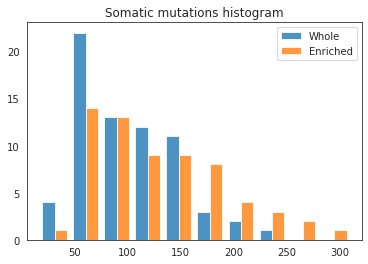

In [439]:
# Histogram
plt.hist([somatic_wt, somatic_et], bins=n_bins, alpha=alpha)
plt.title('Somatic mutations histogram')
plt.legend(['Whole', 'Enriched'])
# plt.hist(counts[counts.source == 'Enriched_Tumor'][['somatic', 'neoepitope']], bins=n_bins, alpha=alpha)
# plt.legend()

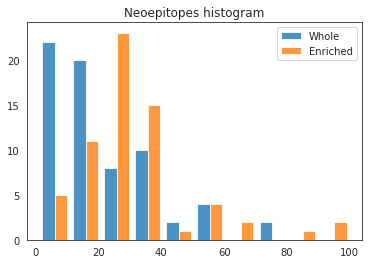

In [440]:
# Histogram
plt.hist([neoepitope_wt, neoepitope_et], bins=n_bins, alpha=alpha)
plt.title('Neoepitopes histogram')
plt.legend(['Whole', 'Enriched'])
# plt.hist(counts[counts.source == 'Enriched_Tumor'][['somatic', 'neoepitope']], bins=n_bins, alpha=alpha)
# plt.legend()

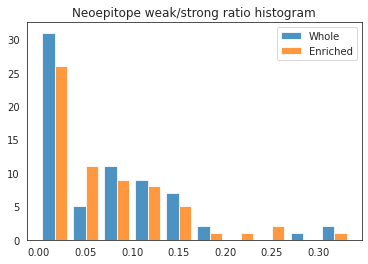

In [441]:
# Histogram
plt.hist([wsratio_wt, wsratio_et], bins=n_bins, alpha=alpha)
plt.title('Neoepitope weak/strong ratio histogram')
plt.legend(['Whole', 'Enriched'])
# plt.hist(counts[counts.source == 'Enriched_Tumor'][['somatic', 'neoepitope']], bins=n_bins, alpha=alpha)
# plt.legend()

Text(0, 0.5, 'Enriched tumor')

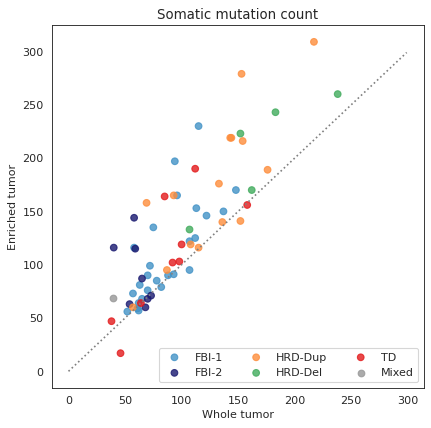

In [379]:
# Scatterplot
plt.figure(figsize=(6, 6), dpi=80)
fbi1 = matched[matched.signature=='FBI-1']
fbi2 = matched[matched.signature=='FBI-2']
hrddup = matched[matched.signature=='HRD-Dup']
hrddel = matched[matched.signature=='HRD-Del']
td = matched[matched.signature=='TD']
mixed = matched[matched.signature=='Mixed']

fbi1 = plt.scatter(x=fbi1.somatic_wt, y=fbi1.somatic_et, alpha=alpha, c=fbi1.color)
fbi2 = plt.scatter(x=fbi2.somatic_wt, y=fbi2.somatic_et, alpha=alpha, c=fbi2.color)
hrddup = plt.scatter(x=hrddup.somatic_wt, y=hrddup.somatic_et, alpha=alpha, c=hrddup.color)
hrddel = plt.scatter(x=hrddel.somatic_wt, y=hrddel.somatic_et, alpha=alpha, c=hrddel.color)
td = plt.scatter(x=td.somatic_wt, y=td.somatic_et, alpha=alpha, c=td.color)
mixed = plt.scatter(x=mixed.somatic_wt, y=mixed.somatic_et, alpha=alpha, c=mixed.color)

plt.plot(range(300), range(300), linestyle="dotted", color="grey")

plt.legend((fbi1, fbi2, hrddup, hrddel, td, mixed),
           ('FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD', 'Mixed'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=10)
plt.title("Somatic mutation count")
plt.xlabel("Whole tumor")
plt.ylabel("Enriched tumor")

Text(0, 0.5, 'Enriched tumor')

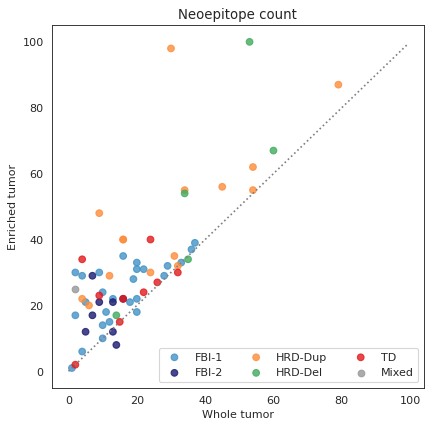

In [325]:
# Scatterplot
plt.figure(figsize=(6, 6), dpi=80)
fbi1 = matched[matched.signature=='FBI-1']
fbi2 = matched[matched.signature=='FBI-2']
hrddup = matched[matched.signature=='HRD-Dup']
hrddel = matched[matched.signature=='HRD-Del']
td = matched[matched.signature=='TD']
mixed = matched[matched.signature=='Mixed']

fbi1 = plt.scatter(x=fbi1.neoepitope_wt, y=fbi1.neoepitope_et, alpha=alpha, c=fbi1.color)
fbi2 = plt.scatter(x=fbi2.neoepitope_wt, y=fbi2.neoepitope_et, alpha=alpha, c=fbi2.color)
hrddup = plt.scatter(x=hrddup.neoepitope_wt, y=hrddup.neoepitope_et, alpha=alpha, c=hrddup.color)
hrddel = plt.scatter(x=hrddel.neoepitope_wt, y=hrddel.neoepitope_et, alpha=alpha, c=hrddel.color)
td = plt.scatter(x=td.neoepitope_wt, y=td.neoepitope_et, alpha=alpha, c=td.color)
mixed = plt.scatter(x=mixed.neoepitope_wt, y=mixed.neoepitope_et, alpha=alpha, c=mixed.color)

plt.plot(range(100), range(100), linestyle="dotted", color="grey")

plt.legend((fbi1, fbi2, hrddup, hrddel, td, mixed),
           ('FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD', 'Mixed'),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=10)
plt.title("Neoepitope count")
plt.xlabel("Whole tumor")
plt.ylabel("Enriched tumor")

Text(0, 0.5, 'Enriched tumor')

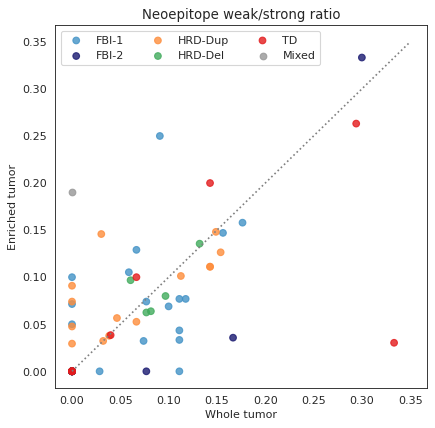

In [384]:
# Scatterplot
plt.figure(figsize=(6, 6), dpi=80)
fbi1 = matched[matched.signature=='FBI-1']
fbi2 = matched[matched.signature=='FBI-2']
hrddup = matched[matched.signature=='HRD-Dup']
hrddel = matched[matched.signature=='HRD-Del']
td = matched[matched.signature=='TD']
mixed = matched[matched.signature=='Mixed']

fbi1 = plt.scatter(x=fbi1['w/s_ratio_wt'], y=fbi1['w/s_ratio_et'], alpha=alpha, c=fbi1.color)
fbi2 = plt.scatter(x=fbi2['w/s_ratio_wt'], y=fbi2['w/s_ratio_et'], alpha=alpha, c=fbi2.color)
hrddup = plt.scatter(x=hrddup['w/s_ratio_wt'], y=hrddup['w/s_ratio_et'], alpha=alpha, c=hrddup.color)
hrddel = plt.scatter(x=hrddel['w/s_ratio_wt'], y=hrddel['w/s_ratio_et'], alpha=alpha, c=hrddel.color)
td = plt.scatter(x=td['w/s_ratio_wt'], y=td['w/s_ratio_et'], alpha=alpha, c=td.color)
mixed = plt.scatter(x=mixed['w/s_ratio_wt'], y=mixed['w/s_ratio_et'], alpha=alpha, c=mixed.color)

plt.plot([0, 0.35], [0, 0.35], linestyle="dotted", color="grey")

plt.legend((fbi1, fbi2, hrddup, hrddel, td, mixed),
           ('FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD', 'Mixed'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=10)
plt.title("Neoepitope weak/strong ratio")
plt.xlabel("Whole tumor")
plt.ylabel("Enriched tumor")

In [385]:
n_bins = 10
alpha = 0.8
# FBI-1      51
# HRD-Dup    29
# TD         17
# FBI-2      16
# HRD-Del     9
somatic_fbi1 = counts[counts.signature == 'FBI-1']['somatic']
somatic_fbi2 = counts[counts.signature == 'FBI-2']['somatic']
somatic_hrddup = counts[counts.signature == 'HRD-Dup']['somatic']
somatic_hrddel = counts[counts.signature == 'HRD-Del']['somatic']
somatic_td = counts[counts.signature == 'TD']['somatic']

neoepitope_fbi1 = counts[counts.signature == 'FBI-1']['neoepitope']
neoepitope_fbi2 = counts[counts.signature == 'FBI-2']['neoepitope']
neoepitope_hrddup = counts[counts.signature == 'HRD-Dup']['neoepitope']
neoepitope_hrddel = counts[counts.signature == 'HRD-Del']['neoepitope']
neoepitope_td = counts[counts.signature == 'TD']['neoepitope']

wsratio_fbi1 = counts[counts.signature == 'FBI-1']['w/s_ratio']
wsratio_fbi2 = counts[counts.signature == 'FBI-2']['w/s_ratio']
wsratio_hrddup = counts[counts.signature == 'HRD-Dup']['w/s_ratio']
wsratio_hrddel = counts[counts.signature == 'HRD-Del']['w/s_ratio']
wsratio_td = counts[counts.signature == 'TD']['w/s_ratio']

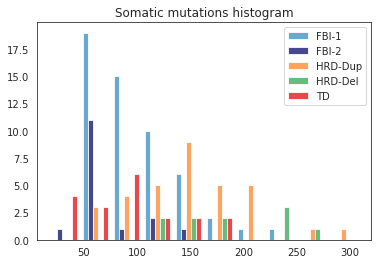

In [333]:
# Histogram
data = [somatic_fbi1, somatic_fbi2, somatic_hrddup, somatic_hrddel, somatic_td]
names = ['FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD']
plt.hist(data, bins=n_bins, alpha=alpha, color=[color_map[x] for x in names])
plt.title('Somatic mutations histogram')
plt.legend(names)

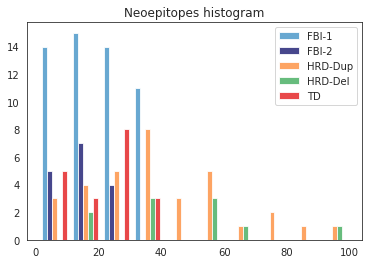

In [332]:
# Histogram
data = [neoepitope_fbi1, neoepitope_fbi2, neoepitope_hrddup, neoepitope_hrddel, neoepitope_td]
names = ['FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD']
plt.hist(data, bins=n_bins, alpha=alpha, color=[color_map[x] for x in names])
plt.title('Neoepitopes histogram')
plt.legend(names)

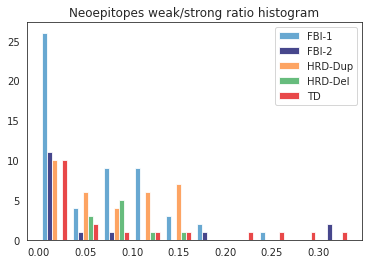

In [387]:
# Histogram
data = [wsratio_fbi1, wsratio_fbi2, wsratio_hrddup, wsratio_hrddel, wsratio_td]
names = ['FBI-1', 'FBI-2', 'HRD-Dup', 'HRD-Del', 'TD']
plt.hist(data, bins=n_bins, alpha=alpha, color=[color_map[x] for x in names])
plt.title('Neoepitopes weak/strong ratio histogram')
plt.legend(names)

### Distribution line plot


/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

Text(0.5, 0, 'Count')

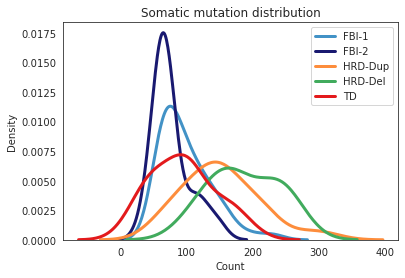

In [330]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':3}, hist=False)
sns.distplot(somatic_fbi1, label="FBI-1", color=color_map['FBI-1'], **kwargs)
sns.distplot(somatic_fbi2, label="FBI-2", color=color_map['FBI-2'], **kwargs)
sns.distplot(somatic_hrddup, label="HRD-Dup", color=color_map['HRD-Dup'], **kwargs)
sns.distplot(somatic_hrddel, label="HRD-Del", color=color_map['HRD-Del'], **kwargs)
sns.distplot(somatic_td, label="TD", color=color_map['TD'], **kwargs)
plt.legend()

plt.title('Somatic mutation distribution')
plt.xlabel("Count")

/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

Text(0.5, 0, 'Count')

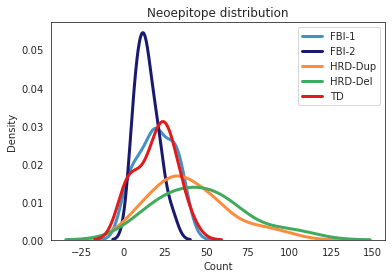

In [331]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':3}, hist=False)
sns.distplot(neoepitope_fbi1, label="FBI-1", color=color_map['FBI-1'], **kwargs)
sns.distplot(neoepitope_fbi2, label="FBI-2", color=color_map['FBI-2'], **kwargs)
sns.distplot(neoepitope_hrddup, label="HRD-Dup", color=color_map['HRD-Dup'], **kwargs)
sns.distplot(neoepitope_hrddel, label="HRD-Del", color=color_map['HRD-Del'], **kwargs)
sns.distplot(neoepitope_td, label="TD", color=color_map['TD'], **kwargs)
plt.legend()

plt.title('Neoepitope distribution')
plt.xlabel("Count")

/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

Text(0.5, 0, 'Ratio')

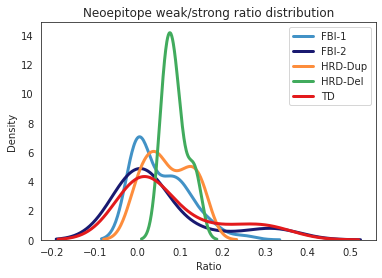

In [389]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':3}, hist=False)
sns.distplot(wsratio_fbi1, label="FBI-1", color=color_map['FBI-1'], **kwargs)
sns.distplot(wsratio_fbi2, label="FBI-2", color=color_map['FBI-2'], **kwargs)
sns.distplot(wsratio_hrddup, label="HRD-Dup", color=color_map['HRD-Dup'], **kwargs)
sns.distplot(wsratio_hrddel, label="HRD-Del", color=color_map['HRD-Del'], **kwargs)
sns.distplot(wsratio_td, label="TD", color=color_map['TD'], **kwargs)
plt.legend()

plt.title('Neoepitope weak/strong ratio distribution')
plt.xlabel("Ratio")

## *Testing grounds*

/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chois7/miniconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


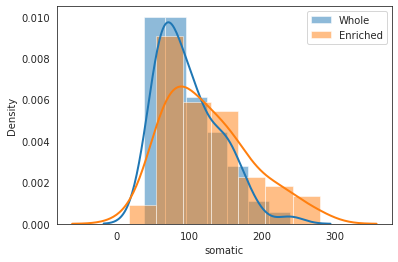

In [95]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
sns.distplot(somatic_wt, label="Whole", **kwargs)
sns.distplot(somatic_et, label="Enriched", **kwargs)
plt.legend()